# Part II - PISA 2012 Data Presentation
## by Keith Obade

## Investigation Overview


> The goal of this presentation is to show the most important findings of this study. Many variables were examined to see which would affects on the students' total scores in maths, reading and science.

The key insights are:

- Mexico has the highest student count who participated with around 34000 students and Lischtestein with less than 1000 students.

- Most students chose the Agree choice then Strongly Agree, Disagree and lastly Strongly disagree. This shows that most students agree that the is motivation to studying.

- The strongest positive correlations can be observed between the scores of the different test areas math, reading, or science.If a student does well in one subject, it is likely that they will do well in another as well.
 
- Most countries performed slightly in the same region in all tests between 400 - 500 points with China being the best performing country in all tests while Peru was the least.
 
- Those who strongly disagreed on all 4 modes of motivation got the lowest scores which might the reason of low scores.

## Dataset Overview

> This is the PISA 2012 Dataset. PISA is the Program for International Student Assessments that allows countries to compare outcomes of the learning as students get close to finishing compulsory schooling.

> This is a survey of the skills and knowledge of students as they approach the end of compulsory education which looks at majorly how prepared the students are for life beyond school. 

> It gives an assessment of reading, mathematics and science representing about 28 million 15-year-olds globally. Of those economies, 44 took part in an assessment of creative problem solving and 18 in an assessment of financial literacy.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")



In [2]:
# load in the dataset into a pandas dataframe
df_pisa4 = pd.read_csv('pisa_new.csv', encoding = "utf-8")
base_color = sb.color_palette()[0]

In [3]:
# Changing the Likert Scale into categories
motivatation_ratings = ['Strongly disagree', 'Disagree', 'Agree','Strongly agree']
mrtings = pd.api.types.CategoricalDtype(ordered = True, categories = motivatation_ratings)
m_vars = ['Motivation_Work', 'Motivation_Career_Chances', 'Motivation_Future_Study','Motivation_Get_Job']

for i in range(len(m_vars)):
    df_pisa4[m_vars[i]] = df_pisa4[m_vars[i]].astype(mrtings)

In [4]:
# Changing the Likert Scale into categories
bel_ratings = ['Strongly disagree', 'Disagree','Agree', 'Strongly agree']
brtings = pd.api.types.CategoricalDtype(ordered = True, categories = bel_ratings)
b_vars = ['Belonging_Feel_Like_Outsider', 'Belonging_Make_Friends_Easily', 'Belonging_Belong_at_School',
          'Belonging_Feel_Awkward_at_School', 'Belonging_Liked_by_Other_Students', 
          'Belonging_Feel_Lonely_at_School', 'Belonging_Feel_Happy_at_School',
         'Belonging_Things_Are_Ideal_at_School', 'Belonging_Satisfied_at_School']

for i in range(len(b_vars)):
    df_pisa4[b_vars[i]] = df_pisa4[b_vars[i]].astype(brtings)

In [5]:
#Change the categories of country and gender
for c in ["Country", "Gender"]:
    df_pisa4[c] = df_pisa4[c].astype(str)

## Number of Students per Country.

> Mexico has the highest students who participated with around 34000 students and Lischtestein with less than 1000 students. I used a horizontal barchart since I am representing categorical data and the variables are many so it is better to use the horizontal bar chart. Here I was looking for how many students were in the different countries and participated in the survey.


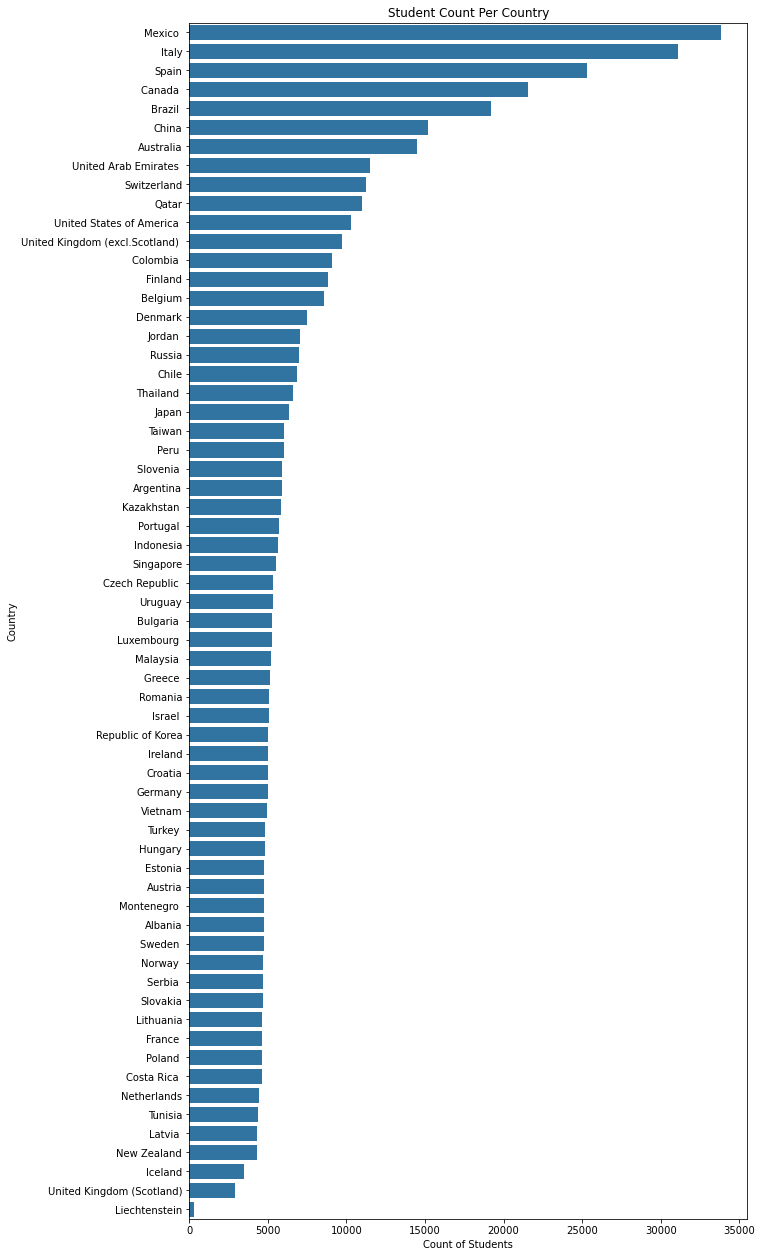

In [6]:
# Plot 1: Bar chart of the countries

# Get the descending order of the Country column
gen_order = df_pisa4['Country'].value_counts().index

# Change the size of the figure to show all the countries clearly
plt.figure(figsize=[10,22])
sb.countplot(data = df_pisa4, y = 'Country', order = gen_order, color=base_color)


# Set the plot's title and labels
plt.title("Student Count Per Country")
plt.ylabel("Country")
plt.xlabel('Count of Students');

## Distribution of the Instrumental motivation ratings by the students.


> Most students chose the Agree choice then Strongly Agree, Disagree and lastly Strongly disagree. This shows that most students agree that the is motivation to studying.- Since I am representing Likert Scale categorical variables, I used bar charts to show how the different levels were performing against the count of students. This shows the relationship between the Instrumental Motivation modes against the number of students that chose each one of them.


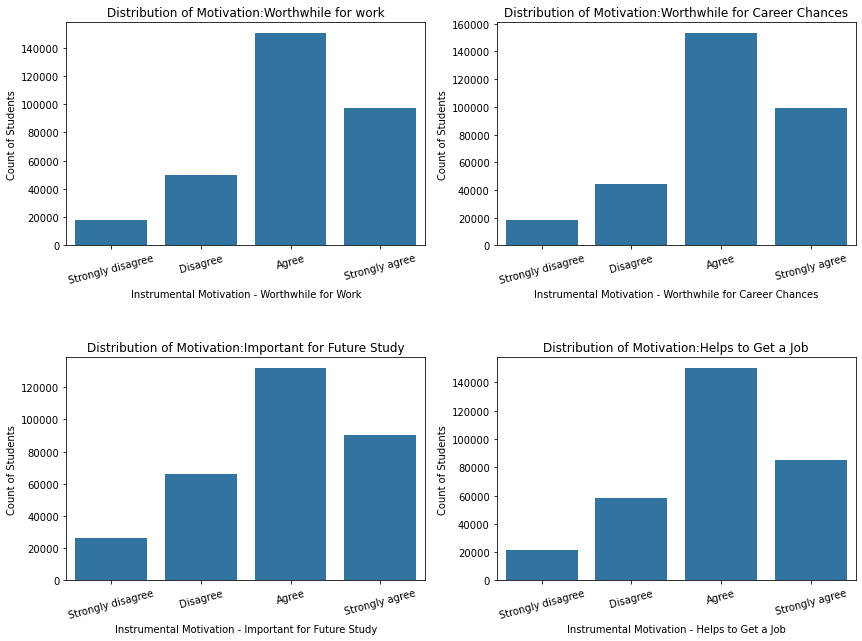

In [7]:
# Setting the size of the plot

plt.figure(figsize = [11.69/2, 8.27/2])


# Plot 4: Bar chart of the Motivation: Worthwhile for work
plt.subplot(2, 2, 1)
sb.countplot(data = df_pisa4, x = 'Motivation_Work', color=base_color);

# Rotate the x-axis ticks so that they don't overlap
plt.xticks(rotation = 15)

# Set the plot's title and labels
plt.title("Distribution of Motivation:Worthwhile for work")
plt.xlabel("Instrumental Motivation - Worthwhile for Work")
plt.ylabel('Count of Students');

# Plot 4: Bar chart of the Motivation: Worthwhile for Career Chances
plt.subplot(2, 2, 2)
sb.countplot(data = df_pisa4, x = 'Motivation_Career_Chances', color=base_color);

# Rotate the x-axis ticks so that they don't overlap
plt.xticks(rotation = 15)

# Set the plot's title and labels
plt.title("Distribution of Motivation:Worthwhile for Career Chances")
plt.xlabel("Instrumental Motivation - Worthwhile for Career Chances")
plt.ylabel('Count of Students');

# Plot 5: Bar chart of the Motivation: Important for Future Study
plt.subplot(2, 2, 3)
sb.countplot(data = df_pisa4, x = 'Motivation_Future_Study', color=base_color);

# Rotate the x-axis ticks so that they don't overlap
plt.xticks(rotation = 15)

# Set the plot's title and labels
plt.title("Distribution of Motivation:Important for Future Study")
plt.xlabel("Instrumental Motivation - Important for Future Study")
plt.ylabel('Count of Students');

# Plot 6: Bar chart of the Motivation: Important for Future Study
plt.subplot(2, 2, 4)
sb.countplot(data = df_pisa4, x = 'Motivation_Get_Job', color=base_color);

# Rotate the x-axis ticks so that they don't overlap
plt.xticks(rotation = 15)

# Set the plot's title and labels
plt.title("Distribution of Motivation:Helps to Get a Job")
plt.xlabel("Instrumental Motivation - Helps to Get a Job")
plt.ylabel('Count of Students');

plt.subplots_adjust(left=None, bottom=None, right=2, top=2, wspace=None, hspace=0.5)

## Correlation of The Different Scores.

> The strongest positive correlations can be observed between the scores of the different test areas math, reading, or science.If a student does well in one subject, it is likely that they will do well in another as well. The correlation matrix also shows comparison of different qualitative variables including the Motivation, Attribution to failure, Sense of Belonging and Perseverance. It also shows the factors affecting the students scores(Sense of Belonging, Attributions of Failure in Maths Score, Motivation for Maths and Perseverance scores) are only weakly correlated with test scores. There are even negatively correlated factors with students' performance in the PISA test, though the correlation is rather weak. This could imply a problem with the factors affecting the student do not reflect on the student scores.

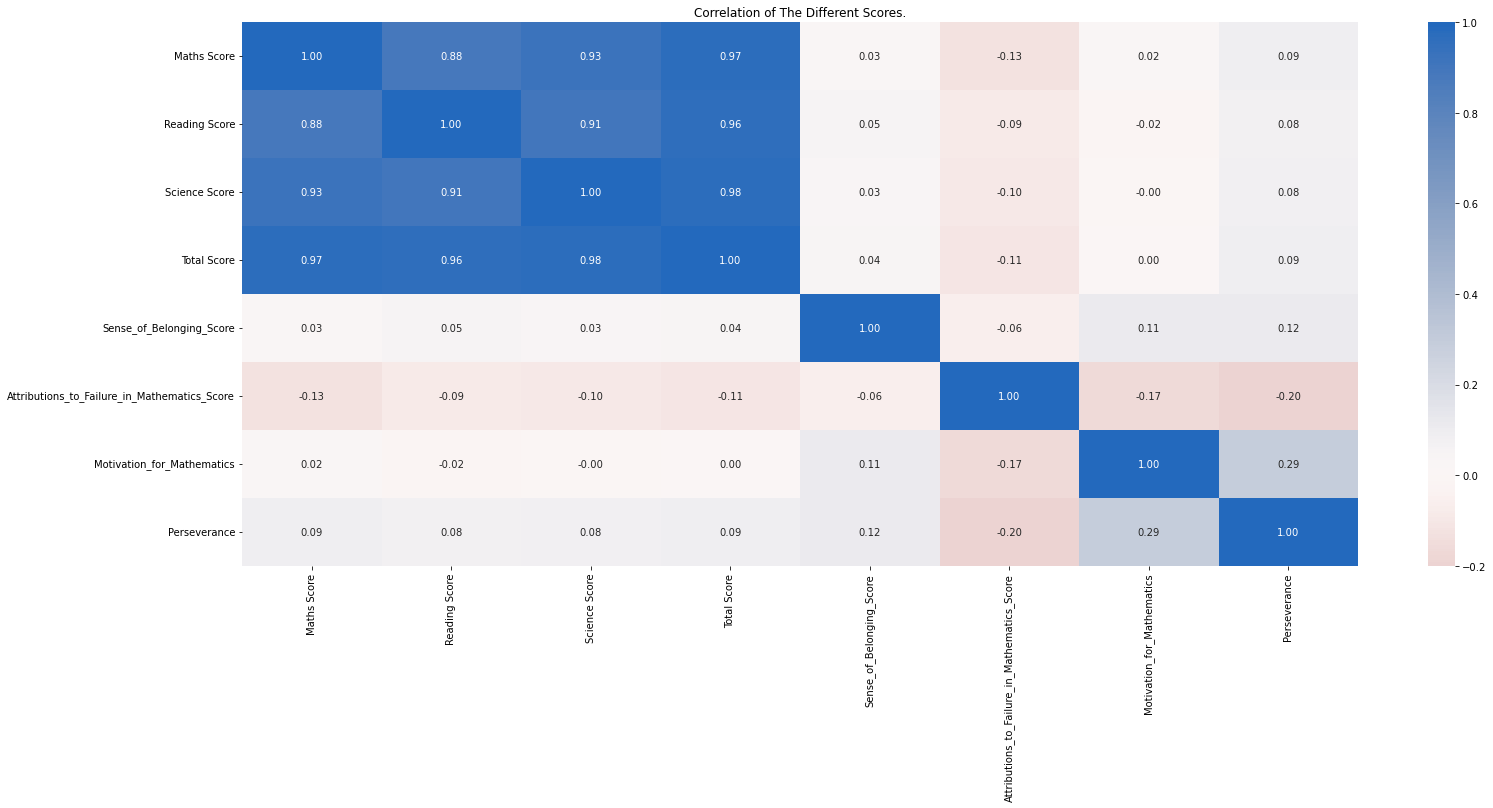

In [8]:
# Plot 2: Correlation matrix of numeric variables concerning test scores and the other scores
numeric_vars = ["Maths Score", "Reading Score", "Science Score", "Total Score", 
                "Sense_of_Belonging_Score", "Attributions_to_Failure_in_Mathematics_Score", 
                "Motivation_for_Mathematics", "Perseverance"]
plt.figure(figsize = [25, 10])
sb.heatmap(df_pisa4[numeric_vars].corr(), annot = True, fmt = '.2f',
           cmap = 'vlag_r', center = 0)
plt.title("Correlation of The Different Scores.")
plt.show()


## Subject Test Scores By Country


> Most countries performed slightly in the same region in all tests between 400 - 500 points with China being the best performing country in all tests while Peru was the least. I used the box plot because it gives a summary of the variables chosen with the lower,middle and upper quartiles and easily shows the means of the different countries.
 

In [9]:
#Grouping the different scores per country
math_order = df_pisa4.groupby('Country')['Maths Score'].mean().sort_values(ascending = False).index
reading_order = df_pisa4.groupby('Country')['Reading Score'].mean().sort_values(ascending = False).index
science_order = df_pisa4.groupby('Country')['Science Score'].mean().sort_values(ascending = False).index

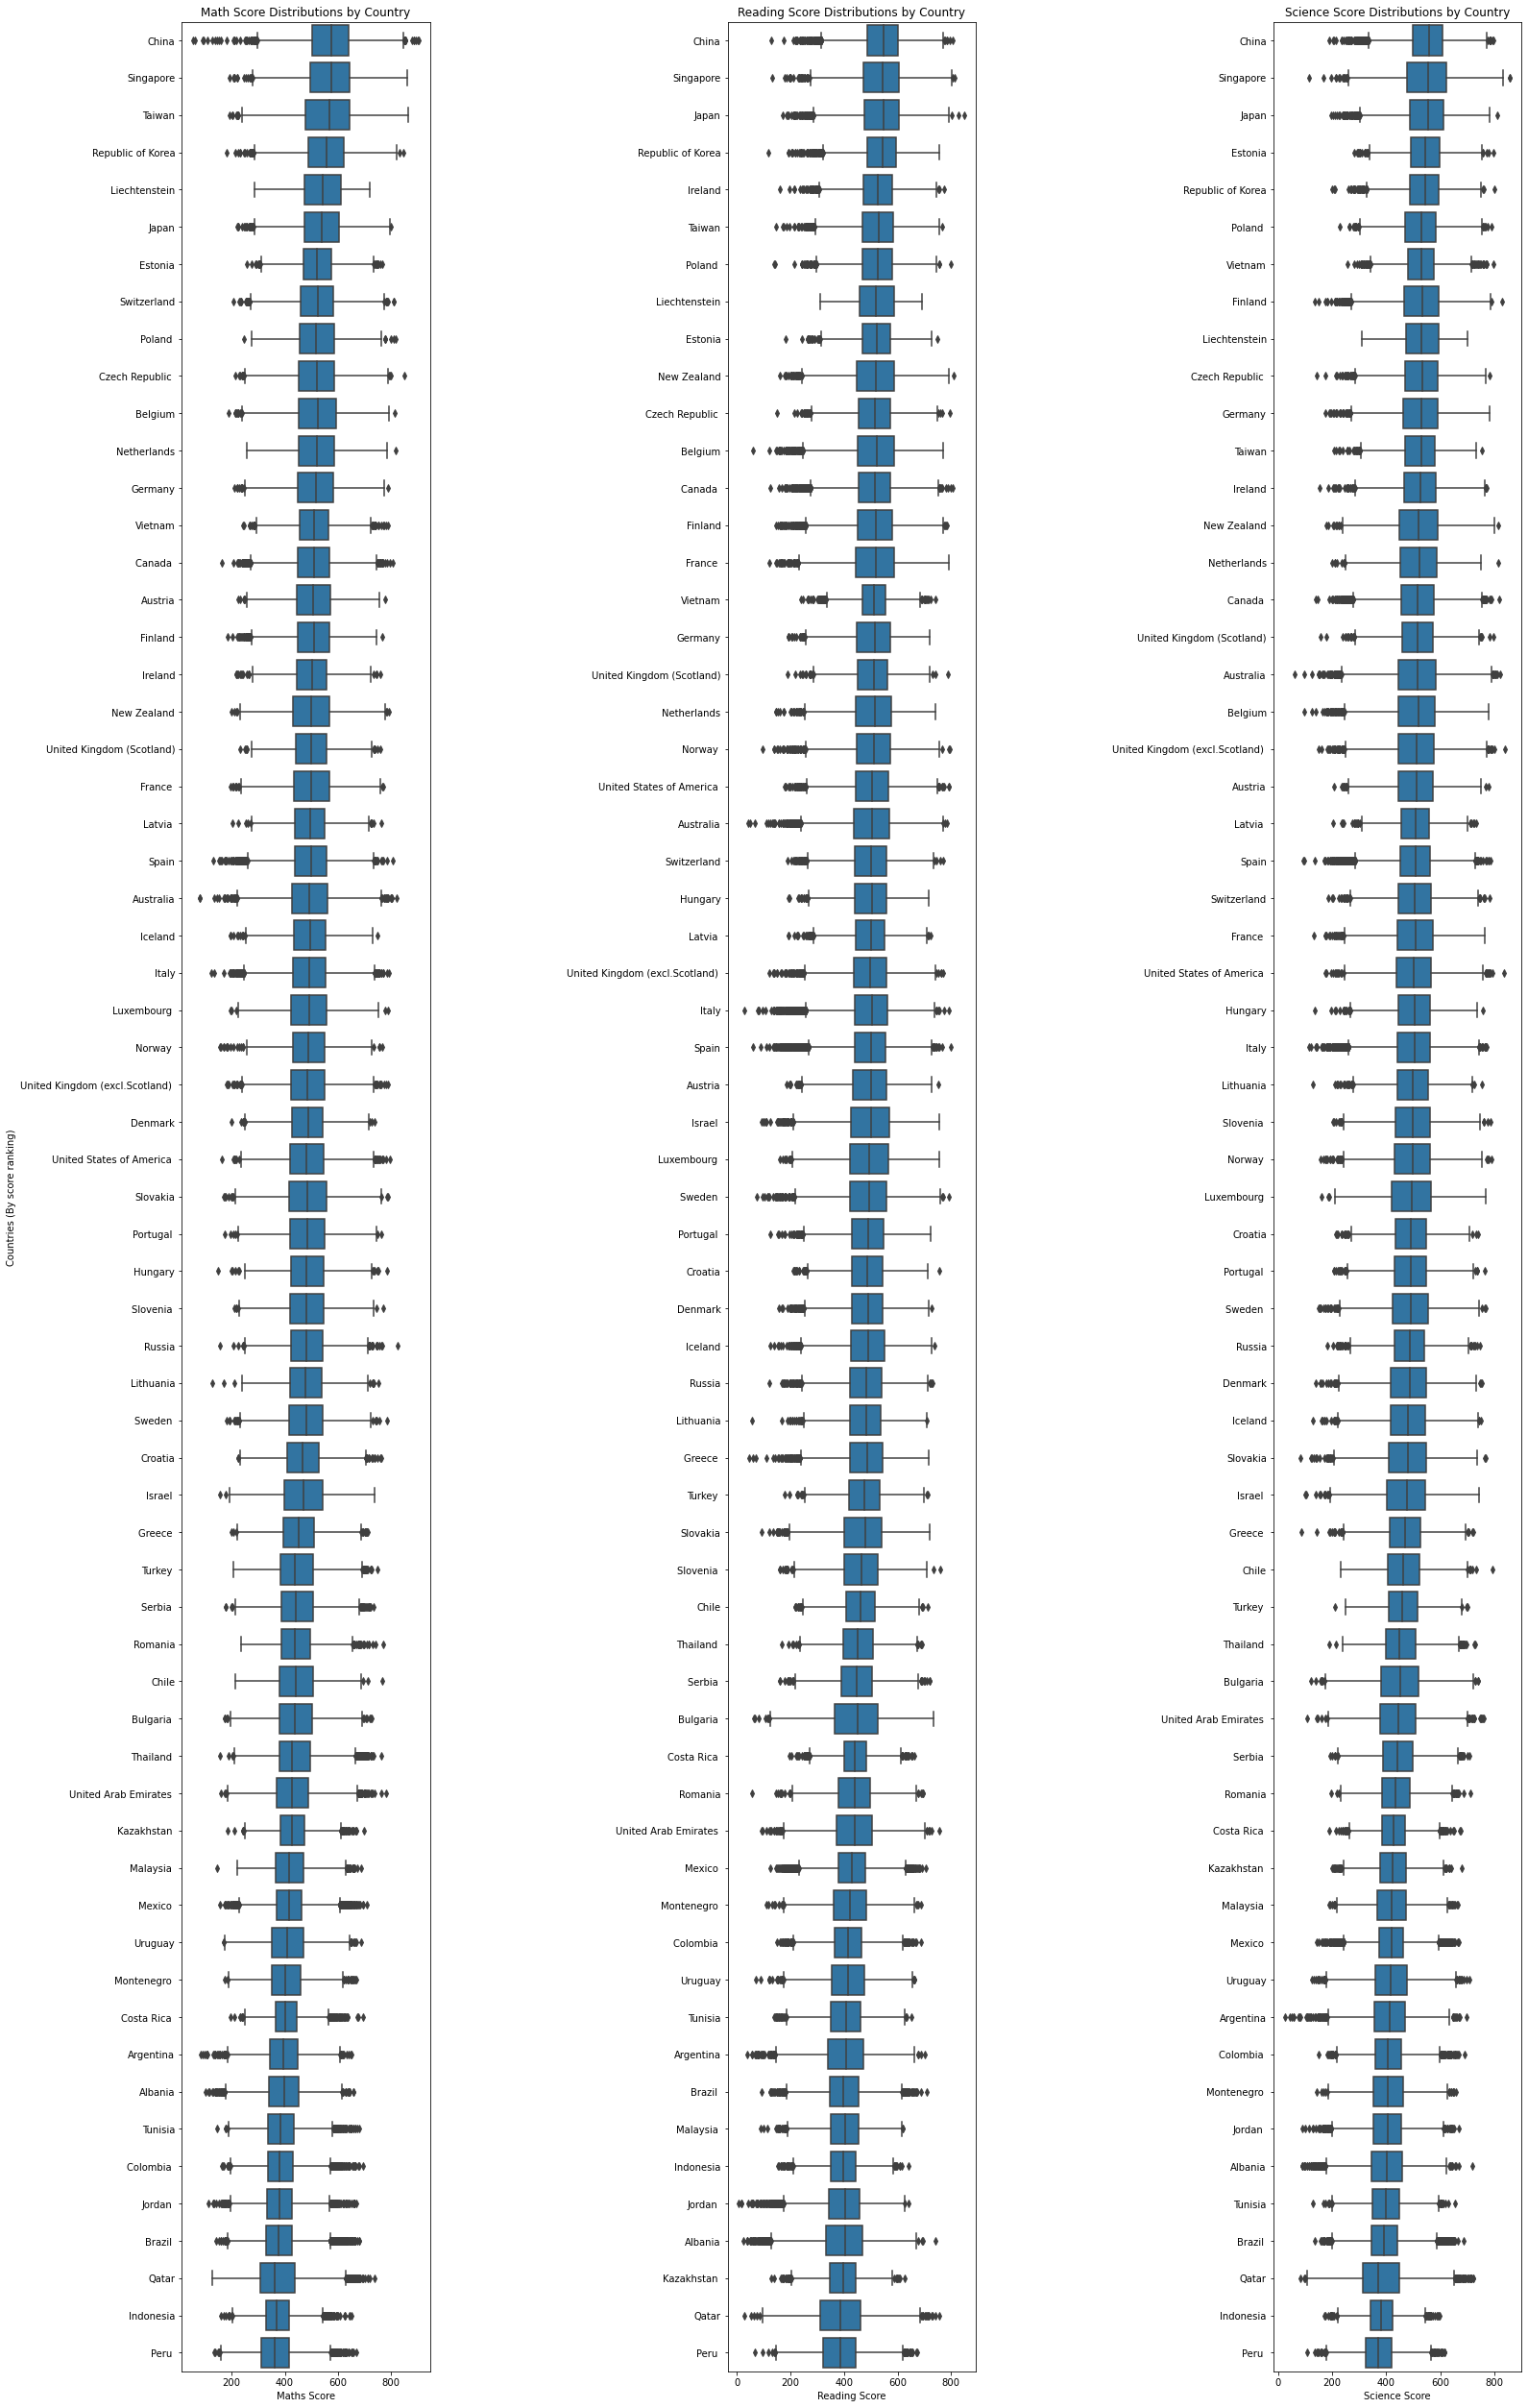

In [10]:
# Plot 3: Different subjects plots for test scores per country

plt.figure(figsize = [25, 45])
plt.subplots_adjust(wspace = 1.2) # adjust spacing between subplots

plt.subplot(1, 3, 1)
sb.boxplot(x = df_pisa4['Maths Score'], y = df_pisa4['Country'], order = math_order, color=base_color);
plt.ylabel('Countries (By score ranking)')
plt.title('Math Score Distributions by Country');

plt.subplot(1, 3, 2)
sb.boxplot(x = df_pisa4['Reading Score'], y = df_pisa4['Country'], order = reading_order, color=base_color);
plt.ylabel(''); # Remove label
plt.title('Reading Score Distributions by Country');

plt.subplot(1, 3, 3)
sb.boxplot(x = df_pisa4['Science Score'], y = df_pisa4['Country'], order = science_order, color=base_color);
plt.ylabel(''); # Remove label
plt.title('Science Score Distributions by Country');

## Instrumental Motivation Ratings Vs Total Test Scores

> Those who strongly disagreed on all 4 modes of motivation got the lowest scores which might the reason of low scores. I used the point plot since I was trying to see the relationship between the Instrumental Motivation and the Total scores of the tests. This gave me a visual representation of how the students performed against their scores.

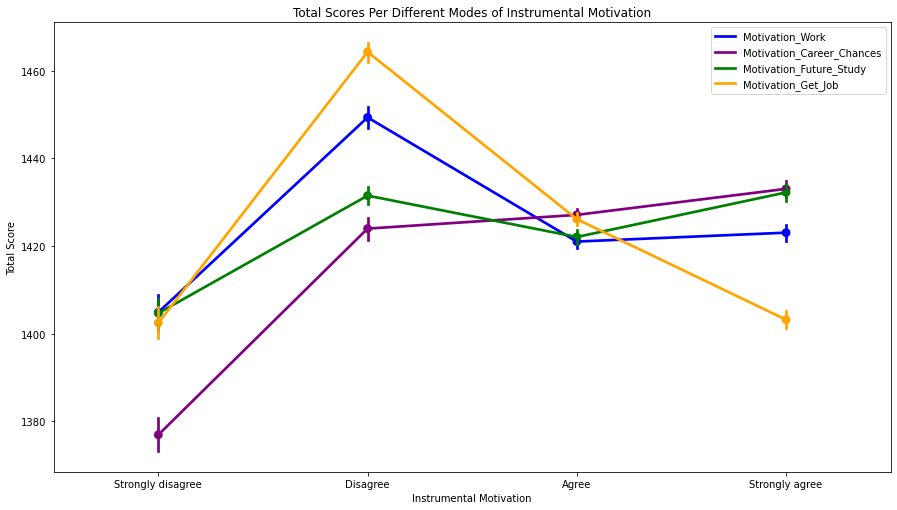

In [11]:
#Point plot to show the relationship between different ratings of the Instrumental Motivation modes against the total scores
plt.figure(figsize=[15, 8.27])
# for color loop
variable_colors = [("Motivation_Work", "blue"), ("Motivation_Career_Chances", "purple"), ("Motivation_Future_Study", "green"), 
                   ("Motivation_Get_Job", "orange")]
for v in variable_colors: 
    ax = sb.pointplot(data = df_pisa4, x = v[0], y = "Total Score", color = v[1], linestyles = "-")
    
plt.legend(labels=["Motivation_Work", "Motivation_Career_Chances", "Motivation_Future_Study", 
                   "Motivation_Get_Job"])
ax = plt.gca()
for v in variable_colors:
    ax.get_legend().legendHandles[variable_colors.index(v)].set_color(v[1])

ax.set(xlabel = "Instrumental Motivation", ylabel= "Total Score", title="Total Scores Per Different Modes of Instrumental Motivation")
plt.show();


### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [12]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_Presentation_PISA_Data.ipynb --to slides --post serve --no-input --no-prompt

^C


> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
